In [1]:
'''
从零实现线性回归，如果对线性回归的知识相对陌生建议先了解一些，本次仅适用tensor和autograd实现一个线性回归模型
'''
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
'''
构造一个简单的人工训练集，并在label上添加一个随机噪声。
样本数据为1000个，每个样本特征数为2，随机生成的样本为规模为1000x2
'''
num_inputs = 2
num_example = 1000
true_w = [2.1, -3.3]
true_b = 4.1
features = torch.randn(num_example, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
#t_w = torch.tensor([2.1, -3.3])
#l = features.mm(t_w.view(2, 1))
#print(labels.size())

In [3]:
print(features[0], labels[0])



tensor([-0.3355, -1.3832]) tensor(7.9537)


In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

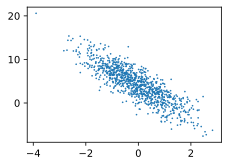

In [5]:
'''
通过生成散点图可以更直观的观察特征值和标签的线性关系
这里仅针对第二个特征进行画图
'''
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].numpy(), labels.numpy(), 0.5)

In [6]:
'''
这里我们定义一个函数：它每次返回batch_size（批量大小）个随机样本的特征和标签。
下面介绍一个新手可能相对陌生的函数
其中index_select函数
函数形式
index_select(
 dim,
 index
)
参数：
dim：表示从第几维挑选数据，类型为int值；
index：表示从第一个参数维度中的哪个位置挑选数据，类型为torch.Tensor类的实例。
'''
def data_iter(batch_size, feature, labels):
    num_example = len(labels)
    indices = list(range(num_example))
    random.shuffle(indices)
    for i in range(0, num_example, batch_size):
        j = torch.LongTensor(indices[i: min(i+batch_size, num_example)])
        yield features.index_select(0, j), labels.index_select(0, j)
        
        

In [7]:
'''初始化模型训练参数'''
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)
print(w,b)

tensor([[0.0127],
        [0.0103]], requires_grad=True) tensor([0.], requires_grad=True)


In [8]:
'''定义线性模型'''
def linreg(X, w, b):
    return torch.mm(X, w) + b


In [9]:
'''定义损失函数'''
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2


In [10]:
'''定义优化算法为sgd'''
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size


In [11]:
'''训练模型过程'''
batch_size = 10
lr = 0.03
num_epoch = 5
net = linreg
loss = squared_loss

for epoch in range(num_epoch):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y).sum()
        l.backward()
        sgd([w,b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_loss = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' %(epoch+1, train_loss.mean().item()))

epoch 1, loss 0.023433
epoch 2, loss 0.000084
epoch 3, loss 0.000052
epoch 4, loss 0.000051
epoch 5, loss 0.000051


In [12]:
'''查看最后训练结果'''
print(w, b)

tensor([[ 2.0994],
        [-3.3000]], requires_grad=True) tensor([4.1000], requires_grad=True)
